<a href="https://colab.research.google.com/github/LinggarM/Movie-Synopsis-Text-Clustering/blob/main/pba_tugas_besar_movie_synopsis_text_clustering_8000_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieve Data 

In [ ]:
import json
import requests

## Retrieve Genres

In [ ]:
# Get All Genres

genres = []
for i in range(1000) :
  url = ("https://api.themoviedb.org/3/movie/%d?api_key=63fea4c709da1f1496b7a1ca7a3c6083" % i)
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if (json_data['genres'] != "") :
      # print(json_data['genres'])
      for j in json_data['genres'] :
        genre = j.get('name')
        if (genre not in genres) :
          genres.append(genre)
  except Exception:
    pass
print(genres)

['Drama', 'Crime', 'Comedy', 'Action', 'Thriller', 'Documentary', 'Adventure', 'Science Fiction', 'Animation', 'Family', 'Romance', 'Mystery', 'Horror', 'Fantasy', 'War', 'Music', 'History', 'Western', 'TV Movie']


In [ ]:
len(genres)

19

## Retrieve Titles & Synopsis

In [ ]:
titles = []
synopsis = []

for i in range(100000) :
  url = ("https://api.themoviedb.org/3/movie/%d?api_key=63fea4c709da1f1496b7a1ca7a3c6083" % i)
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if (json_data['overview'] != "" and json_data['overview'] != "No overview found." and json_data['original_language'] == 'en') :
      titles.append(json_data['title'])
      synopsis.append(json_data['overview'])
      # print(json_data['original_language'], json_data['release_date'], json_data['id'], ". ", json_data['title'], " : ", json_data['overview'])
      # print("\n")
  except Exception:
    pass

In [ ]:
import pandas as pd

df_movies = pd.DataFrame({'title': titles, 'synopsis': synopsis})

In [ ]:
df_movies.head()

,title,synopsis
0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,Star Wars,Princess Leia is captured and held hostage by ...
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44096 entries, 0 to 44095
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44096 non-null  object
 1   synopsis  44096 non-null  object
dtypes: object(2)
memory usage: 689.1+ KB


In [ ]:
df_movies = df_movies.drop(df_movies.index[20000:], axis = 0)
df_movies

,title,synopsis
0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,Star Wars,Princess Leia is captured and held hostage by ...
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."
...,...,...
19995,Vanishing on 7th Street,A mysterious global blackout yields countless ...
19996,"Joe Satriani - Live - The Grove in Anaheim, Ca...","Guitarist Joe Satriani playing In Anaheim, Cal..."
19997,Along the Great Divide,New Federal marshal Len Merrick saves Tim Keit...
19998,StarGaze HD: Universal Beauty,StarGaze HD brings the beauty and majesty of t...


In [ ]:
with open('/content/gdrive/MyDrive/Upload/movie_synopsis.csv', 'w') as f:
  df_movies.to_csv(f)

# Data Preprocessing

## Import Data

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import pandas as pd

df_movies = pd.read_csv('/content/gdrive/MyDrive/Upload/Akademik/Tugas Besar PBA/movie_synopsis_8000_no overview.csv', lineterminator='\n')
df_movies.head()

,title,synopsis
0,Four Rooms,It's Ted the Bellhop's first night on the job....
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J..."
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...
3,Star Wars,Princess Leia is captured and held hostage by ...
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp..."


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     8457 non-null   object
 1   synopsis  8457 non-null   object
dtypes: object(2)
memory usage: 132.3+ KB


## Delete Missing Value

In [6]:
# Get names of indexes for which column Age has value 30
index_drop = df_movies[df_movies['synopsis'] == "No overview found."].index
# Delete these row indexes from dataFrame
df_movies.drop(index_drop , inplace=True)

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8214 entries, 0 to 8456
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     8214 non-null   object
 1   synopsis  8214 non-null   object
dtypes: object(2)
memory usage: 192.5+ KB


## Case Folding

In [9]:
df_movies["synopsis"] = df_movies["synopsis"].str.lower()
df_movies.head()

,title,synopsis
0,Four Rooms,it's ted the bellhop's first night on the job....
1,Judgment Night,"while racing to a boxing match, frank, mike, j..."
2,Life in Loops (A Megacities RMX),timo novotny labels his new project an experim...
3,Star Wars,princess leia is captured and held hostage by ...
4,Finding Nemo,"nemo, an adventurous young clownfish, is unexp..."


## TF-IDF Training

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df_movies['synopsis'].values) # training vector TF-IDF pada tiap data

# vector TF-IDF tiap kalimat (features), pasangan index kata dan nilainya
for i in features :
  print(i)
  print('-----------------------------')

Streaming output truncated to the last 5000 lines.
  (0, 12973)	0.14483275104625953
  (0, 13149)	0.13334586172540167
  (0, 24957)	0.13582667519419955
  (0, 19440)	0.15240864127004877
  (0, 22836)	0.1473720700967724
  (0, 13120)	0.17393621751782645
  (0, 8265)	0.1513027940750261
  (0, 8289)	0.11682112768112195
  (0, 25181)	0.13863052877378373
  (0, 9008)	0.13863052877378373
  (0, 24913)	0.12196110094053371
  (0, 3447)	0.1071559827980113
  (0, 26174)	0.11682112768112195
  (0, 9127)	0.12797983875545338
  (0, 18845)	0.11111454318249671
  (0, 5267)	0.13112128247827526
  (0, 10409)	0.09228187772399131
  (0, 3986)	0.13112128247827526
  (0, 15067)	0.10757735048365544
  (0, 27070)	0.07234665066262949
  (0, 9308)	0.08432181315756035
-----------------------------
  (0, 12857)	0.2131956414188282
  (0, 7006)	0.20392116623243212
  (0, 17420)	0.20392116623243212
  (0, 24874)	0.1814860013138223
  (0, 14253)	0.20392116623243212
  (0, 12384)	0.1845403543585994
  (0, 5709)	0.16710741411314206
  (0, 25391

# KMeans Model Training

In [11]:
from sklearn.cluster import KMeans

k = 19 # jumlah cluster
kmeans_model = KMeans(n_clusters = k, n_init = 3, max_iter = 500)
synopsis_clusters = kmeans_model.fit(features)

# Data Labelling

In [12]:
df_movies['label'] = synopsis_clusters.labels_
df_movies.head()

,title,synopsis,label
0,Four Rooms,it's ted the bellhop's first night on the job....,1
1,Judgment Night,"while racing to a boxing match, frank, mike, j...",8
2,Life in Loops (A Megacities RMX),timo novotny labels his new project an experim...,10
3,Star Wars,princess leia is captured and held hostage by ...,7
4,Finding Nemo,"nemo, an adventurous young clownfish, is unexp...",1


# Data Preview for each Cluster

In [13]:
clusters = df_movies.groupby('label')

for cluster in clusters.groups :
  print("Cluster %d : " % cluster)
  data_cluster = clusters.get_group(cluster)[['title','synopsis']]
  for i in range(5) :
    data = data_cluster.iloc[i]
    print('   ', data['title'], ': ', data['synopsis'])
  print('\n')

Cluster 0 : 
    Unforgiven :  william munny is a retired, once-ruthless killer turned gentle widower and hog farmer. to help support his two motherless children, he accepts one last bounty-hunter mission to find the men who brutalized a prostitute. joined by his former partner and a cocky greenhorn, he takes on a corrupt sheriff.
    48 Hrs. :  a hard-nosed cop reluctantly teams up with a wise-cracking criminal temporarily paroled to him, in order to track down a killer.
    Saw :  obsessed with teaching his victims the value of life, a deranged, sadistic serial killer abducts the morally wayward. once captured, they must face impossible choices in a horrific game of survival. the victims must fight to win their lives back, or die trying...
    Natural Born Killers :  two victims of traumatized childhoods become lovers and psychopathic serial murderers irresponsibly glorified by the mass media.
    Monster :  an emotionally scarred highway drifter shoots a sadistic trick who rapes her

# Save All Data from each Cluster

In [14]:
clusters = df_movies.groupby('label')

for cluster in clusters.groups :
    f = open('cluster'+str(cluster)+ '.csv', 'w') # buat file csv untuk tiap cluster
    data = clusters.get_group(cluster)[['title','synopsis']] # judul dan sinposis tiap data pada tiap cluster
    f.write(data.to_csv(index_label='id')) # simpan ke csv
    f.close()

# Feature Names of each Cluster

In [15]:
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1] # diurutkan berdasarkan indeks -> lalu di-reversed
terms = vectorizer.get_feature_names()
n_terms = 10

for i in range(k) :
	print("Cluster %d :" % i)
	for j in order_centroids [i, :n_terms] :
		print('   %s' % terms[j])
	print('----------')

Cluster 0 :
   killer
   serial
   victims
   sadistic
   detective
   police
   fbi
   killers
   young
   agent
----------
Cluster 1 :
   life
   story
   young
   american
   death
   finds
   people
   evil
   way
   lives
----------
Cluster 2 :
   family
   home
   life
   father
   man
   son
   mother
   old
   house
   young
----------
Cluster 3 :
   school
   high
   student
   teacher
   students
   friends
   girls
   new
   life
   old
----------
Cluster 4 :
   girl
   friends
   old
   year
   life
   love
   best
   father
   young
   little
----------
Cluster 5 :
   wife
   couple
   son
   daughter
   father
   young
   mother
   life
   husband
   frankenstein
----------
Cluster 6 :
   town
   small
   sheriff
   local
   new
   life
   old
   family
   lives
   home
----------
Cluster 7 :
   team
   group
   agent
   fbi
   coach
   rescue
   mission
   nuclear
   football
   new
----------
Cluster 8 :
   police
   detective
   stop
   human
   cop
   blood
   frank
 

Cluster: 0


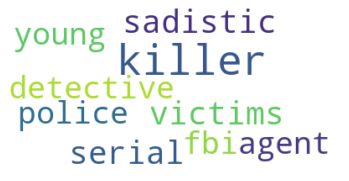

Cluster: 1


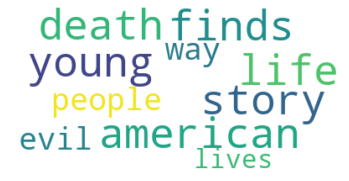

Cluster: 2


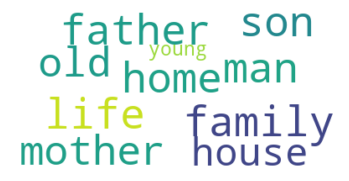

Cluster: 3


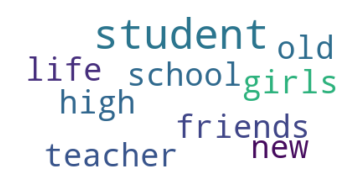

Cluster: 4


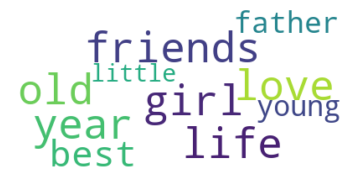

Cluster: 5


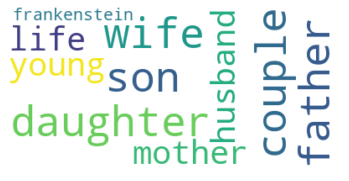

Cluster: 6


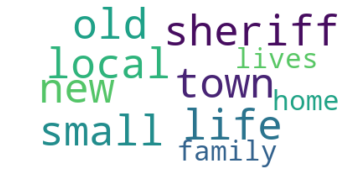

Cluster: 7


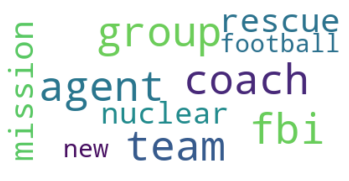

Cluster: 8


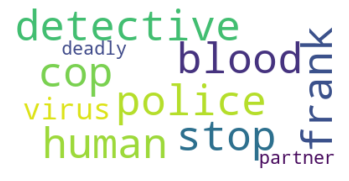

Cluster: 9


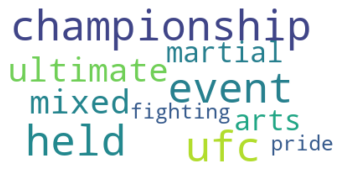

Cluster: 10


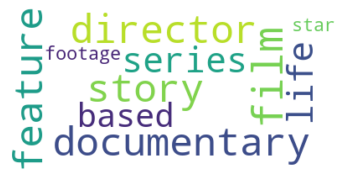

Cluster: 11


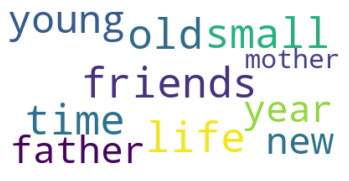

Cluster: 12


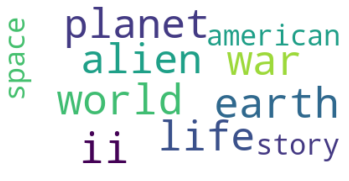

Cluster: 13


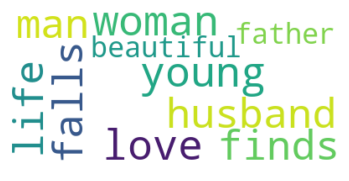

Cluster: 14


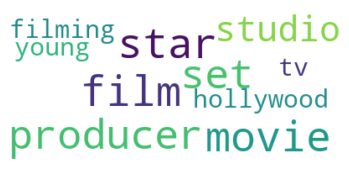

Cluster: 15


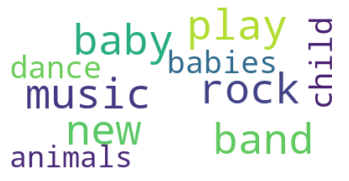

Cluster: 16


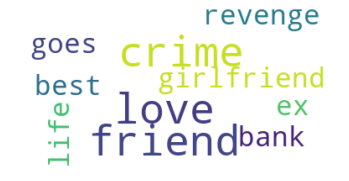

Cluster: 17


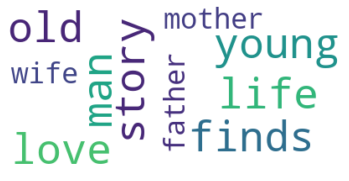

Cluster: 18


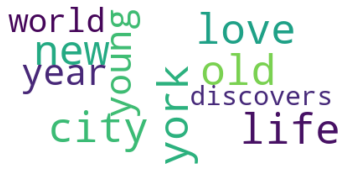

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

c = []
keywords = []
for i in range(k) :
  c.append(i)
  key = ""
  for j in order_centroids [i, :n_terms] :
    key = key+(" ")+(terms[j])
  keywords.append(key)

for i in range(k) :
  print('Cluster: %d' % c[i])
  text = keywords[i]
  wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()


# Predict Sentences

In [17]:
Sentence = ["He was murdered by a killer"]
Y = vectorizer.transform(Sentence)
prediction = kmeans_model.predict(Y)
cluster_prediction = prediction[0]
print("Sentence           : ", Sentence[0])
print("Cluster predicted  : ", cluster_prediction)

Sentence           :  He was murdered by a killer
Cluster predicted  :  0


In [18]:
Sentence = ["Johnstone's Family is very nice family"]
Y = vectorizer.transform(Sentence)
prediction = kmeans_model.predict(Y)
cluster_prediction = prediction[0]
print("Sentence           : ", Sentence[0])
print("Cluster predicted  : ", cluster_prediction)

Sentence           :  Johnstone's Family is very nice family
Cluster predicted  :  2


In [21]:
Sentence = ["There are a lot of aliens at space"]
Y = vectorizer.transform(Sentence)
prediction = kmeans_model.predict(Y)
cluster_prediction = prediction[0]
print("Sentence           : ", Sentence[0])
print("Cluster predicted  : ", cluster_prediction)

Sentence           :  There are a lot of aliens at space
Cluster predicted  :  12


# Evaluation

## Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score

# nilai silhouette score antara -1 dan 1, semakin tinggil semakin bagus
print(f'Silhouette Score : {silhouette_score(features, labels = synopsis_clusters.labels_)}')

Silhouette Score : 0.004543206460686699


## Elbow Method (SSE)

In [ ]:
SSE = []
K = range(3,30)
for k in K:
  kmeans_model = KMeans(n_clusters = k).fit(features)
  SSE.append(kmeans_model.inertia_)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Data Visualization

## 2 Dimensi

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(features.toarray())
reduced_cluster_centers = pca.transform(synopsis_clusters.cluster_centers_)

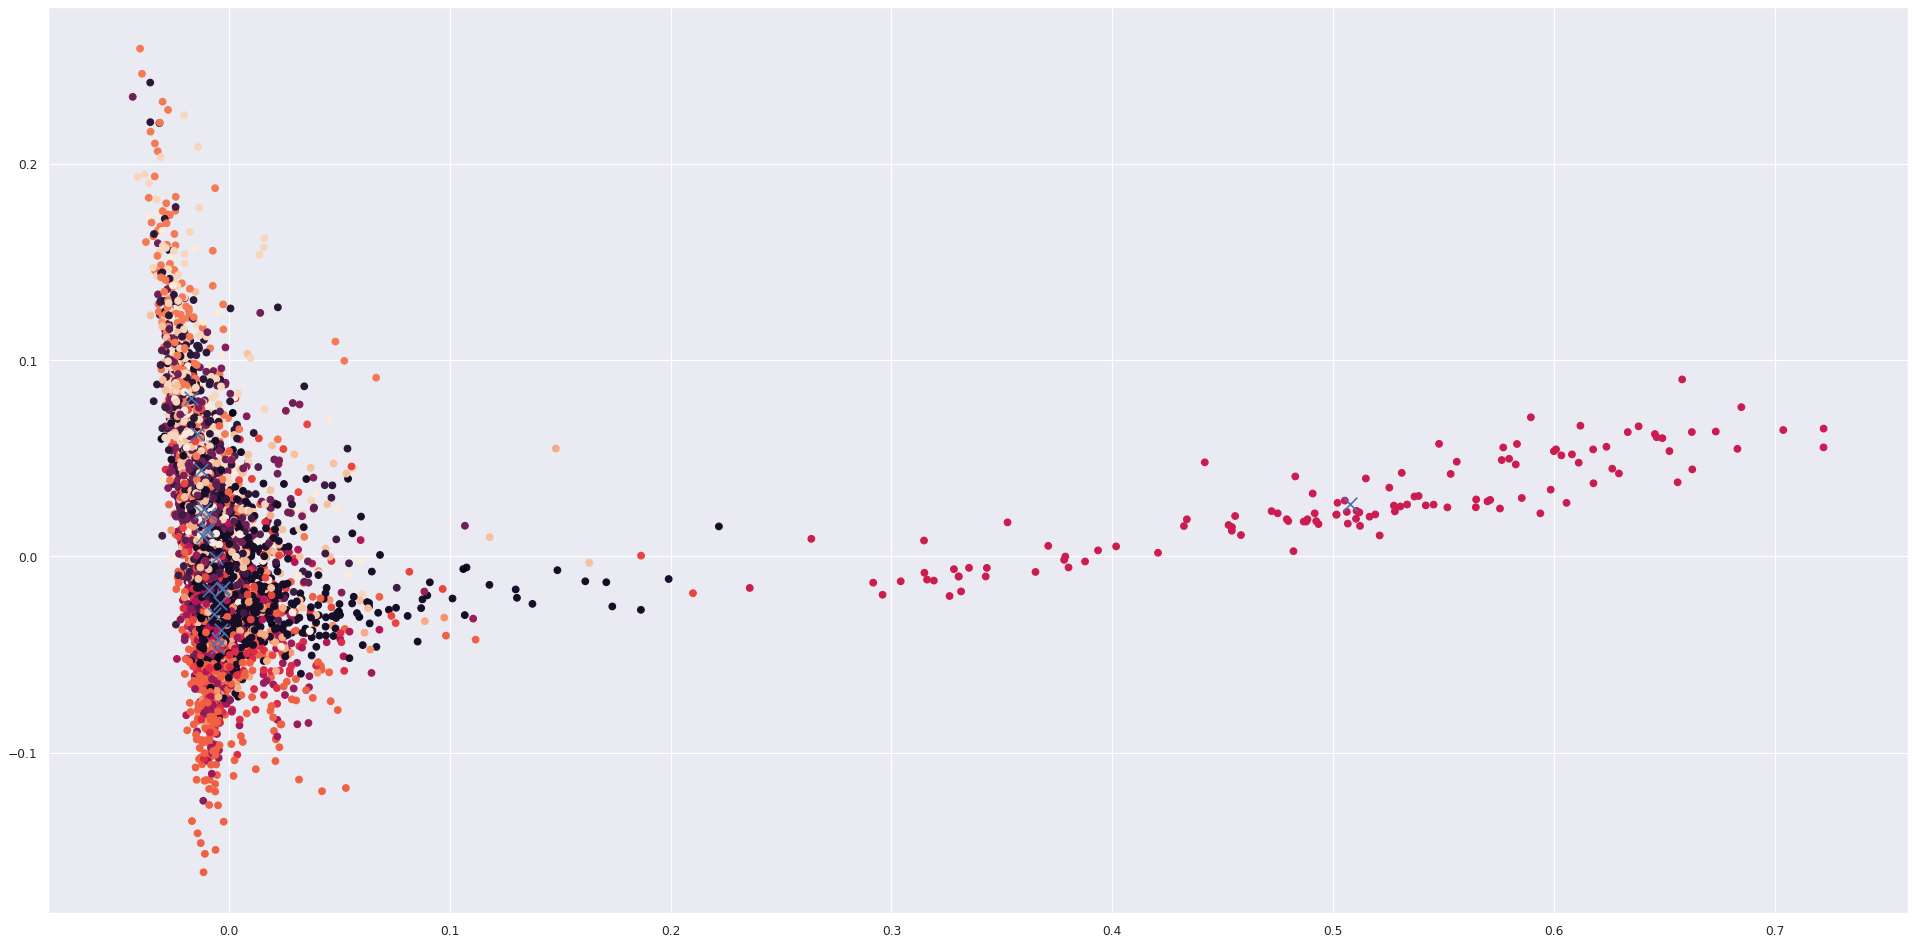

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15), dpi=80)
plt.scatter(reduced_features[:, 0], reduced_features[:,1], c = kmeans_model.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

## 3 Dimensi

In [39]:
from sklearn.decomposition import PCA

pca_3d = PCA(n_components = 3)
reduced_features_3d = pca_3d.fit_transform(features.toarray())
reduced_cluster_centers_3d = pca_3d.transform(synopsis_clusters.cluster_centers_)

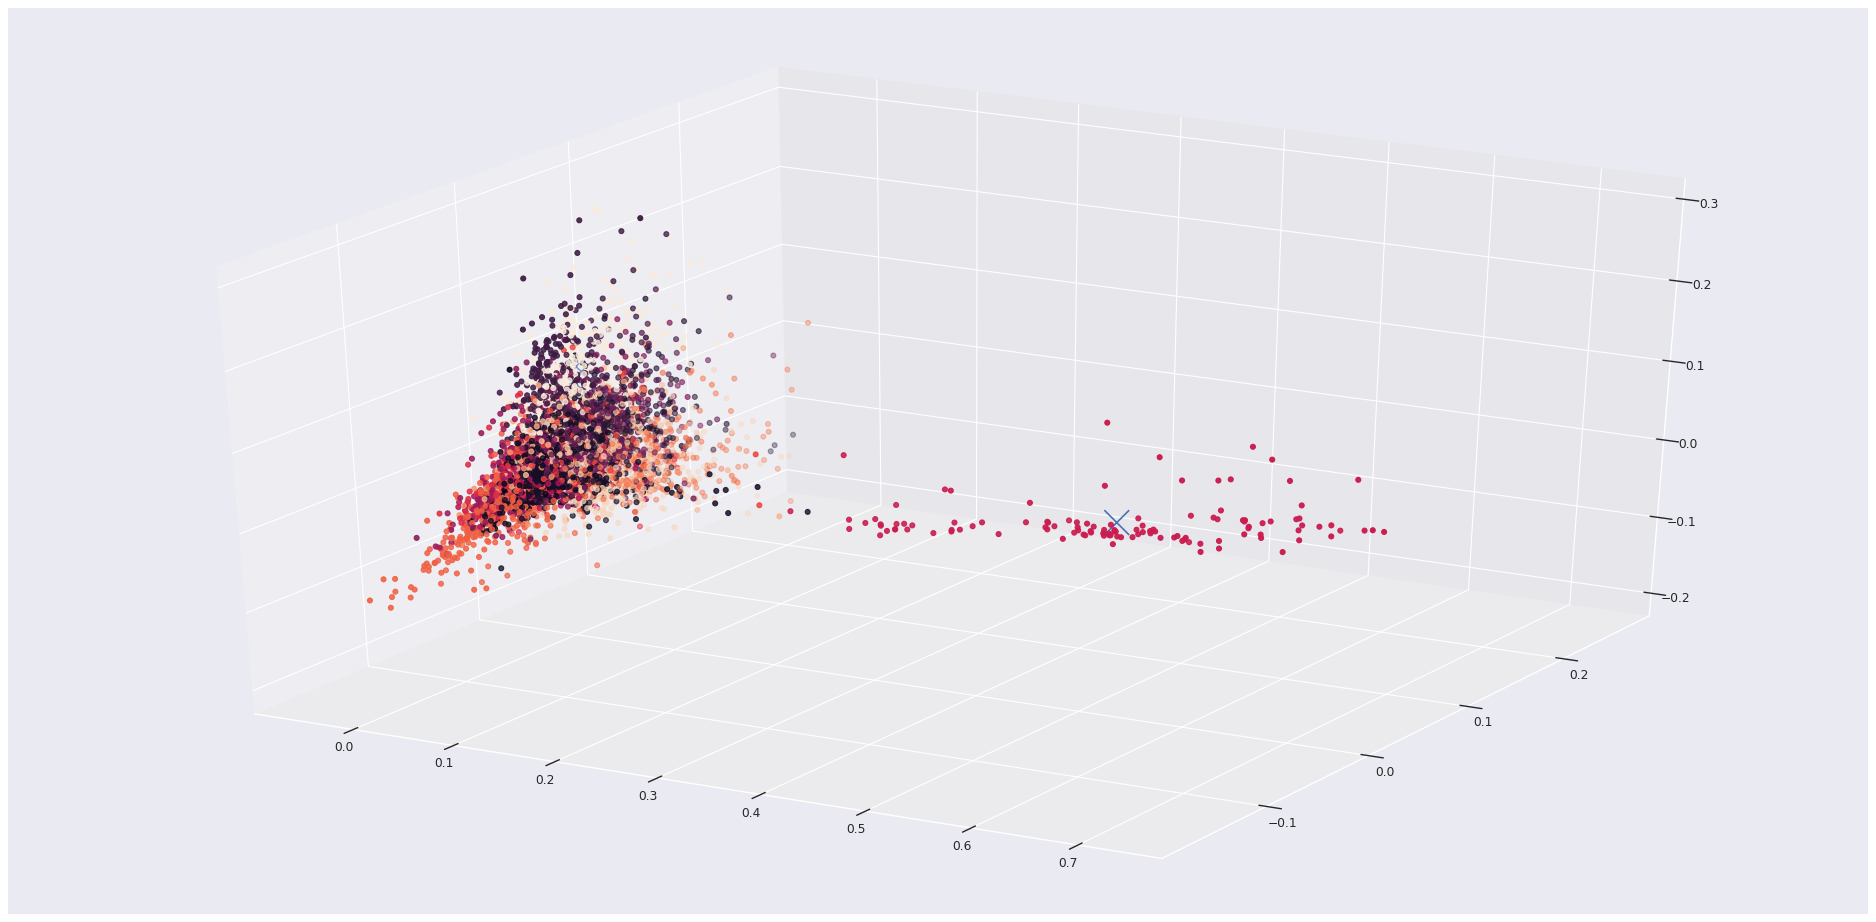

In [61]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(30, 15), dpi=80)
ax = fig.add_subplot(111, projection = '3d')

x = reduced_features_3d[:, 0]
y = reduced_features_3d[:, 1]
z = reduced_features_3d[:, 2]

ax.scatter(x, y, z, c = synopsis_clusters.labels_)
ax.scatter(reduced_cluster_centers_3d[:, 0], reduced_cluster_centers_3d[:,1], reduced_cluster_centers_3d[:,2], marker='x', s=500, c='b')

plt.show()